In [1]:
!wget https://datahack-prod.s3.amazonaws.com/test_file/test_KaymcHn.csv
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_jqd04QH.csv
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_sxfcbdx.csv

--2020-05-10 17:26:36--  https://datahack-prod.s3.amazonaws.com/test_file/test_KaymcHn.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.116
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1453325 (1.4M) [text/csv]
Saving to: ‘test_KaymcHn.csv’

test_KaymcHn.csv    100%[===================>]   1.39M   919KB/s    in 1.5s    

2020-05-10 17:26:39 (919 KB/s) - ‘test_KaymcHn.csv’ saved [1453325/1453325]

--2020-05-10 17:26:40--  https://datahack-prod.s3.amazonaws.com/train_file/train_jqd04QH.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.92
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1817701 (1.7M) [text/csv]
Saving to: ‘train_jqd04QH.csv’

train_jqd04QH.csv   100%[======

In [2]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
test = pd.read_csv('test_KaymcHn.csv')
train = pd.read_csv('train_jqd04QH.csv')

In [4]:
train.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0


In [5]:
test.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94


In [6]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape

(enrollee_id                  0
 city                         0
 city_development_index       0
 gender                    4098
 relevent_experience          0
 enrolled_university        342
 education_level            457
 major_discipline          2838
 experience                  59
 company_size              4779
 company_type              5039
 last_new_job               367
 training_hours               0
 target                       0
 dtype: int64, enrollee_id                  0
 city                         0
 city_development_index       0
 gender                    3388
 relevent_experience          0
 enrolled_university        279
 education_level            395
 major_discipline          2393
 experience                  44
 company_size              4051
 company_type              4330
 last_new_job               304
 training_hours               0
 dtype: int64, (18359, 14), (15021, 13))

In [7]:
train['training_hours'].value_counts()

28     307
12     291
18     285
20     269
22     263
      ... 
244      6
234      6
272      5
238      4
286      4
Name: training_hours, Length: 241, dtype: int64

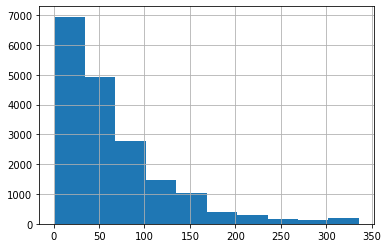

In [8]:
train['training_hours'].hist()

In [0]:
train['gender']=train['gender'].fillna(method='bfill')
test['gender']=test['gender'].fillna(method='bfill')

In [0]:
train['enrolled_university']=train['enrolled_university'].fillna(method='bfill')
test['enrolled_university']=test['enrolled_university'].fillna(method='bfill')

In [0]:
train['education_level']=train['education_level'].fillna(method='bfill')
test['education_level']=test['education_level'].fillna(method='bfill')

In [0]:
train['major_discipline']=train['major_discipline'].fillna(method='bfill')
test['major_discipline']=test['major_discipline'].fillna(method='bfill')

In [0]:
train['experience']=train['experience'].fillna(method='bfill')
test['experience']=test['experience'].fillna(method='bfill')

In [0]:
train['company_size']=train['company_size'].fillna(method='bfill')
test['company_size']=test['company_size'].fillna(method='bfill')

In [0]:
train['company_type']=train['company_type'].fillna(method='bfill')
test['company_type']=test['company_type'].fillna(method='bfill')

In [0]:
train['last_new_job']=train['last_new_job'].fillna(method='bfill')
test['last_new_job']=test['last_new_job'].fillna(method='bfill')

In [0]:
test['major_discipline']=test['major_discipline'].fillna(method='ffill')
test['company_size']=test['company_size'].fillna(method='ffill')
test['company_type']=test['company_type'].fillna(method='ffill')
test['last_new_job']=test['last_new_job'].fillna(method='ffill')

In [0]:
c=['gender','enrolled_university','education_level','major_discipline','experience','company_type','company_size','last_new_job','city','relevent_experience']
for i in c:
  loc = np.append(train[i].values, test[i].values, axis=0)
  from sklearn.preprocessing import LabelEncoder
  l=LabelEncoder()
  l.fit(list(set(loc)))
  train[i]=l.transform(train[i])
  test[i]=l.transform(test[i])

In [0]:
train_df=train

In [0]:
X = train_df.drop(labels=['target'], axis=1)
y = train_df['target'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=42)

In [22]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((15605, 13), (15605,), (2754, 13), (2754,))

In [0]:
from math import sqrt 
from sklearn.metrics import roc_auc_score

In [24]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'num_leaves':20,
         'boosting': 'dart',  
         'metric': 'mae',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 80,
         'max_depth': 6,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 142,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('roc_auc_score:', roc_auc_score(y_cv,y_pred_lgbm))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid_0's l1: 0.193986
[200]	valid_0's l1: 0.187547
[300]	valid_0's l1: 0.194164
[400]	valid_0's l1: 0.200011
[500]	valid_0's l1: 0.204621
[600]	valid_0's l1: 0.205526
[700]	valid_0's l1: 0.207712
[800]	valid_0's l1: 0.208612
[900]	valid_0's l1: 0.21092
[1000]	valid_0's l1: 0.211637
roc_auc_score: 0.6158466024422823


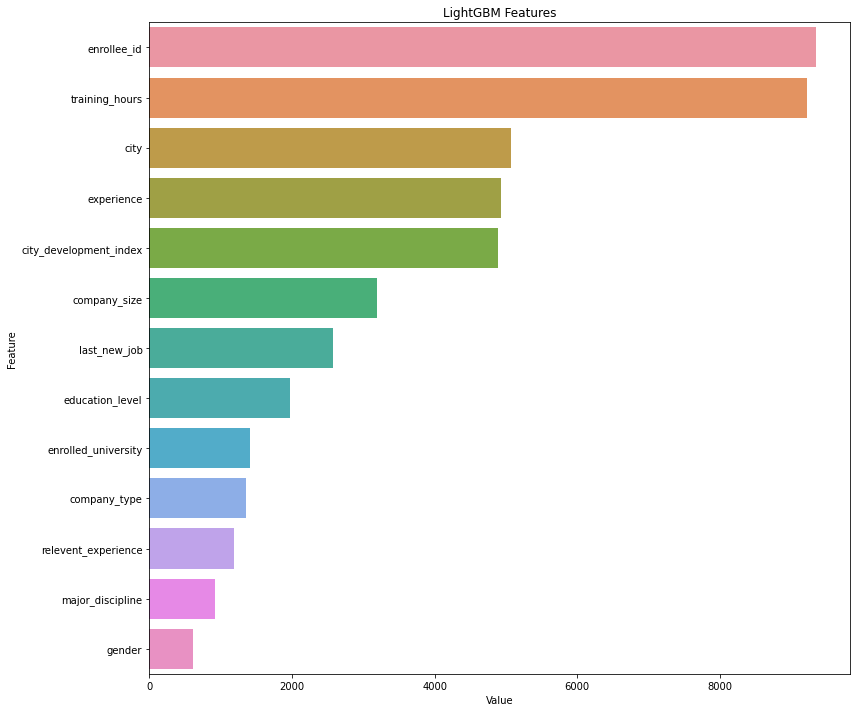

In [25]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test

In [34]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=
             30, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=100, max_depth=31, learning_rate=0.01, n_estimators=1000, min_child_samples=20, subsample=0.80)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    y_pred_lgbm = lgbm.predict(X_test)
    print("roc_auc_score: ", roc_auc_score(y_test, y_pred_lgbm))

    errlgb.append(roc_auc_score(y_test, y_pred_lgbm))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

roc_auc_score:  0.5435010362812307
roc_auc_score:  0.6592757980369618
roc_auc_score:  0.6058079032484882
roc_auc_score:  0.6405707841776542
roc_auc_score:  0.6154513888888888
roc_auc_score:  0.6776489193463363
roc_auc_score:  0.6292107685227796
roc_auc_score:  0.585623133606892
roc_auc_score:  0.5882048872180452
roc_auc_score:  0.6136907501150484
roc_auc_score:  0.625125572050452
roc_auc_score:  0.6136326295900765
roc_auc_score:  0.6498604199538779
roc_auc_score:  0.6073695977726686
roc_auc_score:  0.634773498530986
roc_auc_score:  0.5607989614412281
roc_auc_score:  0.6334537493158183
roc_auc_score:  0.6522529069767442
roc_auc_score:  0.6301792303637321
roc_auc_score:  0.6449086802827966
roc_auc_score:  0.6540689139776336
roc_auc_score:  0.6305287802408723
roc_auc_score:  0.6996759622937941
roc_auc_score:  0.6265331890331889
roc_auc_score:  0.6308022706721592
roc_auc_score:  0.6525058528601322
roc_auc_score:  0.62089802526961
roc_auc_score:  0.6321963227167688
roc_auc_score:  0.6549500

In [35]:
np.mean(errlgb,0)

0.6302795932972146

In [36]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([0.29944708, 0.10233257, 0.15304055, ..., 0.13517524, 0.21044433,
       0.19856501])

In [37]:
submission = pd.DataFrame({
        "enrollee_id": test['enrollee_id'],
        "target": lgbm_final
    })
submission.to_csv('./submission.csv', index=False)
print(submission)

       enrollee_id    target
0            16548  0.299447
1            12036  0.102333
2            11061  0.153041
3             5032  0.117627
4            17599  0.141437
...            ...       ...
15016        11308  0.113977
15017        14612  0.269329
15018        33346  0.135175
15019        14506  0.210444
15020        32641  0.198565

[15021 rows x 2 columns]


In [0]:
from google.colab import files
files.download('submission.csv')

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.01, n_estimators=100, random_state=101, subsample=0.8, loss='ls')
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('score', roc_auc_score(y_cv, y_pred))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1109           0.0000            2.05s
         2           0.1112           0.0000            1.88s
         3           0.1130           0.0000            1.81s
         4           0.1131           0.0001            1.71s
         5           0.1115           0.0001            1.65s
         6           0.1131           0.0001            1.60s
         7           0.1121           0.0000            1.57s
         8           0.1118           0.0001            1.54s
         9           0.1122           0.0000            1.51s
        10           0.1108           0.0000            1.47s
        20           0.1115           0.0000            1.26s
        30           0.1115           0.0000            1.09s
        40           0.1096           0.0000            0.93s
        50           0.1108           0.0000            0.77s
        60           0.1119           0.0000            0.62s
       

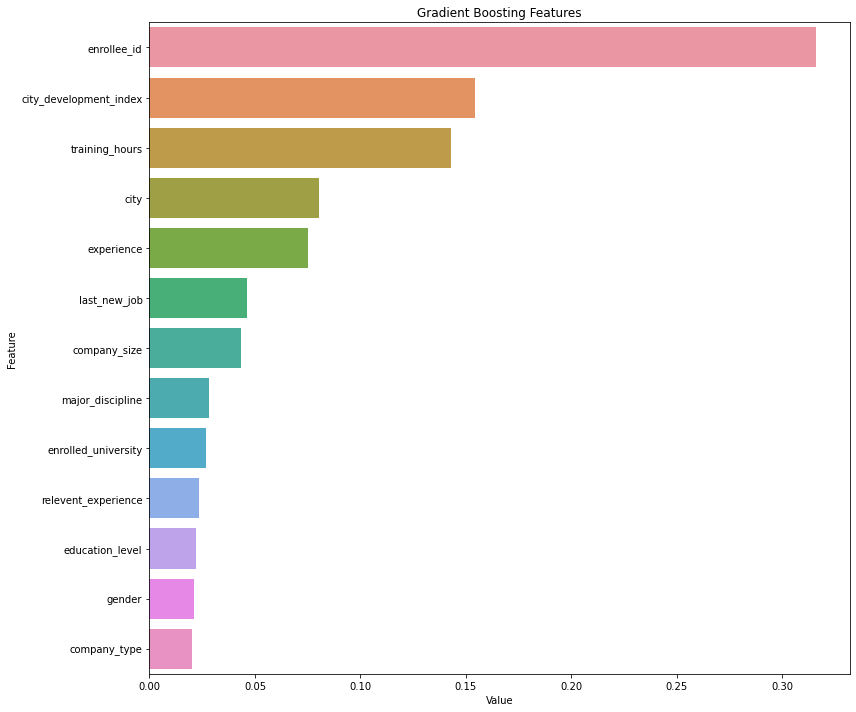

In [0]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test

In [0]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=101, subsample=0.9)
    #gb = GradientBoostingRegressor(learning_rate=0.01, n_estimators=100, random_state=101, subsample=0.8,loss='ls')
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print('Score', roc_auc_score(y_test, y_pred, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None))

    errgb.append(roc_auc_score(y_test, y_pred, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

Score 0.6221507917730524
Score 0.628660797428911
Score 0.6298670738553284
Score 0.6209490842555287


In [0]:
np.mean(errgb,0)

0.6357409552389904

In [0]:
cat_final = np.mean(y_pred_totgb,0)
cat_final

array([0.50113047, 0.12888452, 0.23286489, ..., 0.13079739, 0.22283007,
       0.27185908])

In [0]:
submission = pd.DataFrame({
        "enrollee_id": test['enrollee_id'],
        "target": cat_final
    })
submission.to_csv('./Av1.csv', index=False)
print(submission)

       enrollee_id    target
0            16548  0.501130
1            12036  0.128885
2            11061  0.232865
3             5032  0.091858
4            17599  0.097448
...            ...       ...
15016        11308  0.109460
15017        14612  0.230871
15018        33346  0.130797
15019        14506  0.222830
15020        32641  0.271859

[15021 rows x 2 columns]


In [0]:
from google.colab import files
files.download('Av1.csv')

In [0]:
#test.to_csv('test.csv')

# Ensemble

In [39]:
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-hr-analytics/842_613210_us_submission_2_wKTIJD2.csv
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-hr-analytics/842_613210_us_submission_2.csv
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-hr-analytics/842_613210_us_ea492576b8e0.csv
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-hr-analytics/842_613210_us_03d546b48fab.csv

--2020-05-10 18:03:00--  https://datahack-prod.s3.amazonaws.com/submissions/janatahack-hr-analytics/842_613210_us_submission_2_wKTIJD2.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.64
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278762 (272K) [application/vnd.ms-excel]
Saving to: ‘842_613210_us_submission_2_wKTIJD2.csv’

842_613210_us_submi 100%[===================>] 272.23K   273KB/s    in 1.0s    

2020-05-10 18:03:02 (273 KB/s) - ‘842_613210_us_submission_2_wKTIJD2.csv’ saved [278762/278762]

--2020-05-10 18:03:04--  https://datahack-prod.s3.amazonaws.com/submissions/janatahack-hr-analytics/842_613210_us_submission_2.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.72
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.72|:443... connected.
HTT

In [0]:
a=pd.read_csv('842_613210_us_submission_2_wKTIJD2.csv')
b=pd.read_csv('842_613210_us_submission_2.csv')
c=pd.read_csv('842_613210_us_ea492576b8e0.csv')
d=pd.read_csv('842_613210_us_03d546b48fab.csv')

In [0]:
pt_1=a['target']
pt_2=b['target']
pt_3=c['target']
pt_4=d['target']

In [0]:
tp=pt_1*0.8+pt_4*0.2
#tp = ((pt_1 * 0.3 + pt_4 * 0.7) * 0.3 + pt_1*0.7)*0.65 + pt_4*0.35

In [61]:
submission = pd.DataFrame({
        "enrollee_id": a['enrollee_id'],
        "target": tp
    })
submission.to_csv('./Av1.csv', index=False)
print(submission)

       enrollee_id    target
0            16548  0.438279
1            12036  0.090506
2            11061  0.270658
3             5032  0.053987
4            17599  0.068166
...            ...       ...
15016        11308  0.138771
15017        14612  0.307288
15018        33346  0.096391
15019        14506  0.198704
15020        32641  0.245006

[15021 rows x 2 columns]


In [0]:
from google.colab import files
files.download('Av1.csv')